
<img src="../images/5thNRST_logo.png" alt="NOWPAP" width="900" height="700">

## NOWPAP REMOTE SENSING TRAINING COURSE   
#### Webinar 2: Monitoring and Assessment of Water Quality by Ocean Color Remote Sensing
<span style="color:brown; font-size:1.1em;font-style:italic"> Time series analysis: Extract point/region of interest from a series of images</span>

<hr style="border:2px solid rgb(30,70,125)"> </hr>

<span style="font-family:Helvieta; font-size:2em;">Eligio Maure (maure@npec.or.jp)</span>

***
**Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

# Table of contents
- [1. Purpose](#1.-Purpose)
- [2. Library import](#2.-Library-import)
- [3. Define parameters](#3.-Define-parameters)
- [4. Point extract](#4.-Point-extract)
- [5. Region extract](#5.-Region-extract)
- [6. Resources](#6.-Resources)
***

# 1. Purpose
[Return to the "Table of contents"](#Table-of-contents)

The objective of this exercise is to learn how to extract the mean of a point or region from a series of satellite images.  
The images used are obtained from the [Marine Environmental Watch](https://ocean.nowpap3.go.jp/?page_id=862) of Northwest Pacific Action Plan (NOWPAP).

***

# 2. Library import
[Return to the "Table of contents"](#Table-of-contents)

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# System
import sys
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sys.path.append(str(Path('.').absolute().parent)) 
import sutils as util
util.mpl_custom(mpl=plt)

# 3. Define parameters
[Return to the "Table of contents"](#Table-of-contents)

In [7]:
INTPUT_DIR = Path('.').absolute().joinpath(r'data\YOC')
INPUT_FILE = INTPUT_DIR.joinpath('annual_max_1998_2020.csv')

# 4. Trend detection
[Return to the "Table of contents"](#Table-of-contents)
- Start with a simple linear trend model

In [10]:
# Read data
df = pd.read_csv(INPUT_FILE)
df.head()

,filename,time_start,time_end,Chla [mg m$^{-3}$],Day$_{Max}$
0,Y19982020_CHL_NW_month_Max.nc,1998-01-15T00:00:00Z,1998-12-16T00:00:00Z,6.165950,1998197
1,Y19982020_CHL_NW_month_Max.nc,1999-01-15T00:00:00Z,1999-12-16T00:00:00Z,6.165950,1999289
2,Y19982020_CHL_NW_month_Max.nc,2000-01-15T00:00:00Z,2000-12-16T00:00:00Z,3.672823,2000290
3,Y19982020_CHL_NW_month_Max.nc,2001-01-15T00:00:00Z,2001-12-16T00:00:00Z,4.677351,2001258
4,Y19982020_CHL_NW_month_Max.nc,2002-01-15T00:00:00Z,2002-12-16T00:00:00Z,5.559043,2002197


<AxesSubplot:xlabel='Day$_{Max}$'>

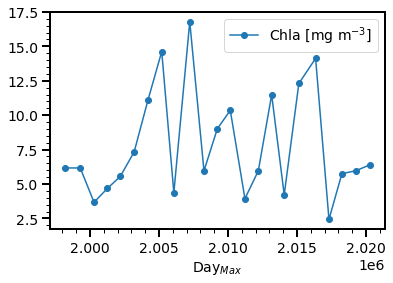

In [16]:
# Display the annual max time series
df.plot(y='Chla [mg m$^{-3}$]', x='Day$_{Max}$', marker='o')

- Get the trend and display the result

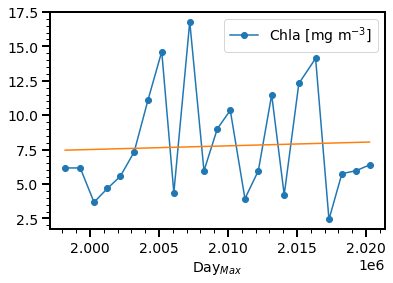

In [20]:
f = np.poly1d(np.polyfit(df['Day$_{Max}$'], df['Chla [mg m$^{-3}$]'], 1))
x = np.sort(df['Day$_{Max}$'])
m, b = f.coeffs
yp = m * x + b

fig, ax = plt.subplots()
df.plot(y='Chla [mg m$^{-3}$]', x='Day$_{Max}$', marker='o', ax=ax)
ax.plot(x, yp)

[Return to the "Table of contents"](#Table-of-contents)
- Get trend using Sen's slope method

<div class="alert alert-block alert-success"/div>
    <b>Done!</b><br>
  
--- 

#### And thank you for your attention! :)
    We hope you enjoyed the training provided by NOWPAP CEARAC.

# 5. Resources
[Go back to the "Table of contents"](#Table-of-contents)
1. https://matplotlib.org/stable/tutorials/advanced/path_tutorial.html
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
4. https://ocean.nowpap3.go.jp/?page_id=862
5. https://github.com/npec/5th-NOWPAP-Training-Course-on-Remote-Sensing-Data-Analysis